# Compte rendu groupe 7 au format notebook

### Liens vers le rapport Power BI

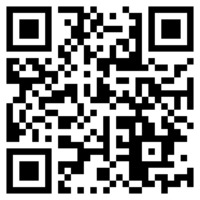

https://disguisehub-1.my.canva.site/sae-groupe7

   Le changement climatique représente l'un des défis les plus complexes auxquels notre planète est confrontée au 21e siècle. En cette ère technologique, où les activités industrielles et les modes de vie modernes sont étroitement liés à l'émission de gaz à effet de serre, il est impératif de comprendre et d'agir face à cette réalité incontournable. Ce rapport vise à étudier de manière approfondie la dynamique du changement climatique, en mettant en lumière les données qui attestent de son existence.


   Au cœur de cette étude se trouve une exploration des données de température et d'émissions de CO2 sur une période de 60 années. Nous nous appuierons sur des analyses statistiques rigoureuses et des visualisations pertinentes pour démontrer l'évolution des températures à l'échelle mondiale, régionale et nationale, ainsi que leur corrélation avec les émissions de gaz à effet de serre.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
fichier_data = "data\Environment_Temperature_change_E_All_Data_NOFLAG.csv"

In [3]:
def generer_graph(fichier, pays, debut, fin):
    
    df = pd.read_csv(fichier_data, encoding='latin1')
    
    df = df.loc[df['Area'] == pays].head(24)

    col_a_suppr = ['Element Code', 'Months Code', 'Unit', 'Area Code']
    #df = df.drop(col_a_suppr, axis=1)


    df_temp = df[df['Element'] == 'Temperature change']
    df_deviation = df[df['Element'] == 'Standard Deviation']


    df_temp_change = df[(df['Area'] == pays) & (df['Element'] == 'Temperature change')]

    #Moyennne des temperature change sur la période donnée
    temperature_change_periode = []

    for annee in range(debut, fin):
        temperature_change_periode.append(df_temp_change[f'Y{annee}'].to_numpy())
    
    periode = []
    for i in range(12):
        tab = []
        for j in range(fin-debut):
            val = temperature_change_periode[j][i]
            tab.append(val)
        periode.append(round(np.mean(tab),5))
        del(tab)
    
    #Temperature change
    plt.plot(df_temp['Months'], periode, label= f'Avg Temp change between {debut} and {fin}', color = 'blue')

    #Standard deviation
    plt.plot(df_deviation['Months'], df_deviation['Y1961'], label='Standard Deviation', linewidth=2.0, color ='red')

    #valeurs extrêmes
    plt.scatter(df_deviation['Months'], periode, color = 'green', s=10)


    plt.title(f'Evolution of temperature change and standard deviation in {pays}')
    plt.xlabel('Month')
    plt.ylabel('Value (°C)')

    plt.ylim(-0.5, 3)

    plt.legend()

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Afficher le diagramme
    plt.show()

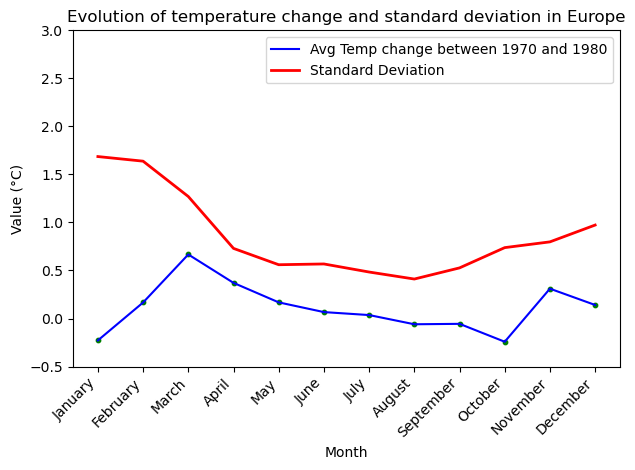

In [4]:
generer_graph(fichier_data, "Europe", 1970, 1980)

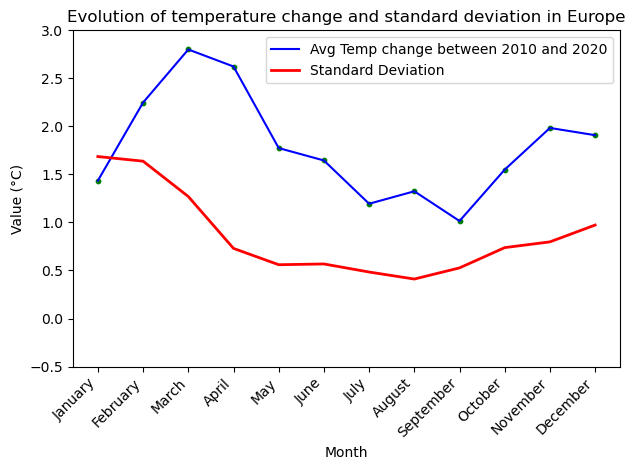

In [5]:
generer_graph(fichier_data, "Europe", 2010, 2020)

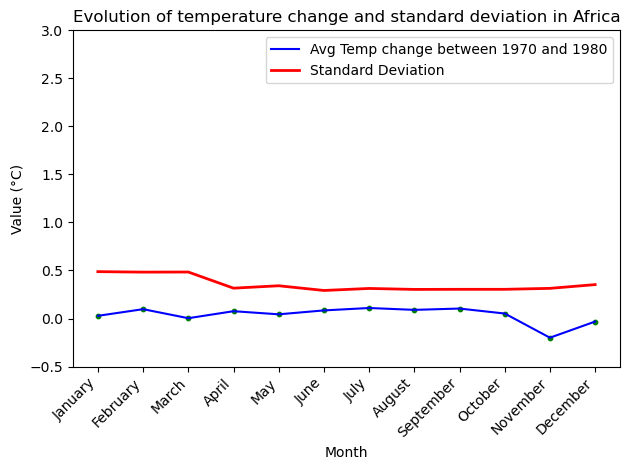

In [6]:
generer_graph(fichier_data, "Africa", 1970, 1980)

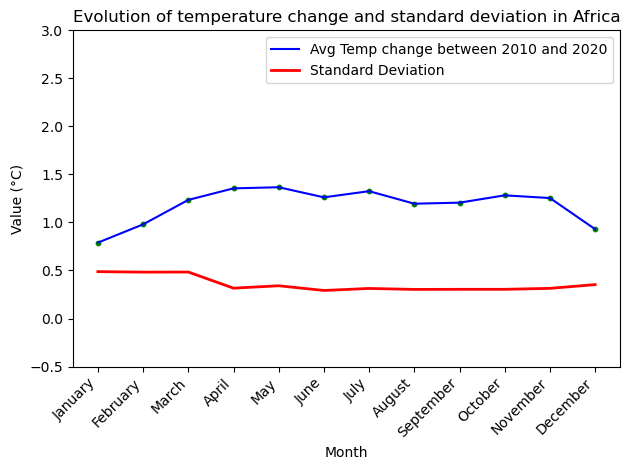

In [7]:
generer_graph(fichier_data, "Africa", 2010, 2020)

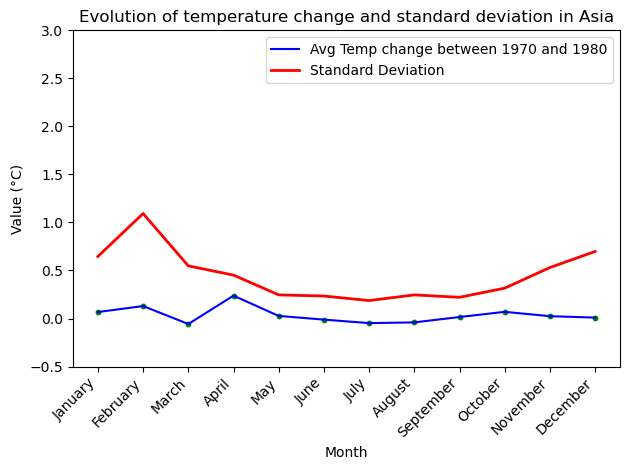

In [8]:
generer_graph(fichier_data, "Asia", 1970, 1980)

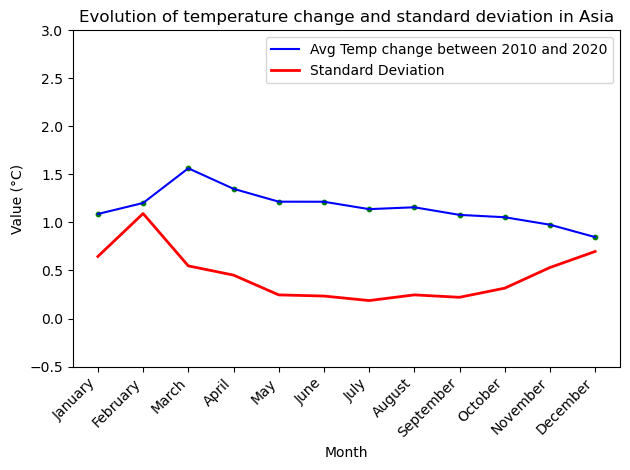

In [9]:
generer_graph(fichier_data, "Asia", 2010, 2020)

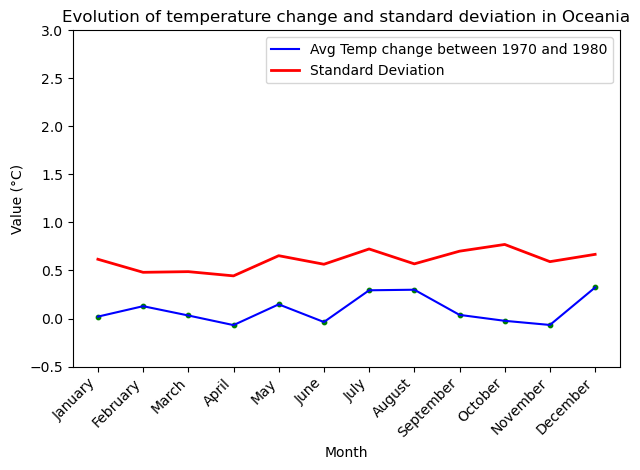

In [10]:
generer_graph(fichier_data, "Oceania", 1970, 1980)

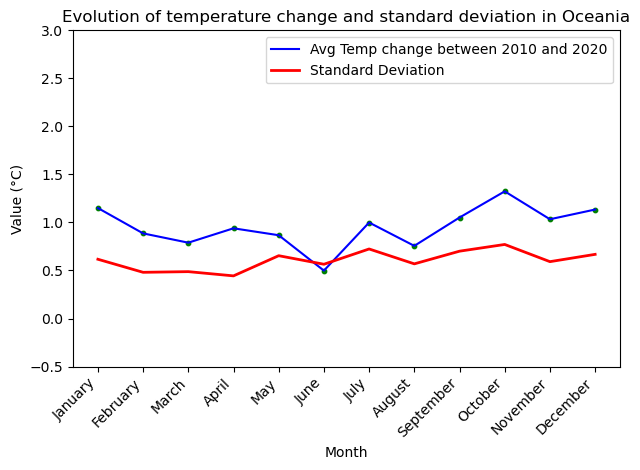

In [11]:
generer_graph(fichier_data, "Oceania", 2010, 2020)

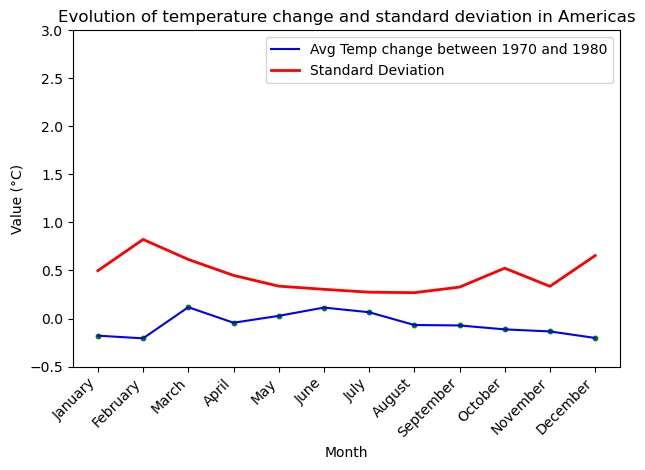

In [12]:
generer_graph(fichier_data, "Americas", 1970, 1980)

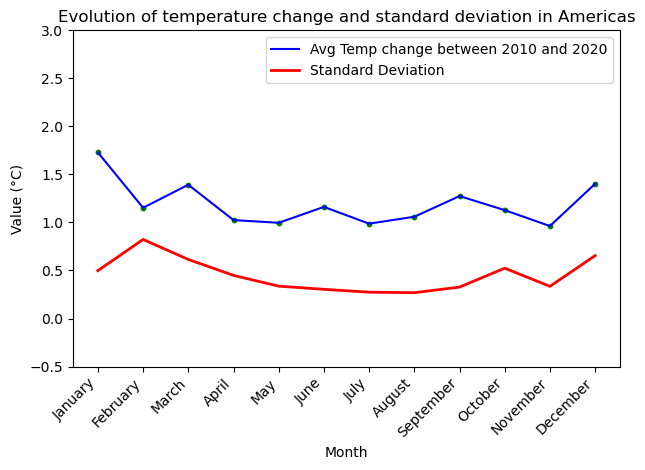

In [13]:
generer_graph(fichier_data, "Americas", 2010, 2020)

Grâce à ces graphes, on peut constater une forte augmentation de l'écart-type des températures présente sur tous les continents. Un facteur qui pourrait nous aider à mieux comprendre ces variations de températures sont les émissions de CO2 émises à travers le monde. Pour cela, nous avons réuni les données concernant les émissions de CO2 de chaque pays depuis 1990 afin de réaliser une carte interactive que voici.

In [14]:
import pandas as pd 
import json
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'

In [15]:
def initgeojson():
    pays = json.load(open("data\countries.geojson",'r'))
    pays_id_dic={}
    for feature in pays['features']:
        feature['id'] = feature['properties']['ISO_A3']
        pays_id_dic[feature['properties']['ADMIN']] = feature['id']
    return pays

In [16]:
def Map_annee(pays):
    annees = [i for i in range(1990, 2020)]
    liste_chaines = [str(x) for x in annees]
    liste_chaines.append('Country Code')
    df_pays = pd.read_csv("data\API_EN.ATM.CO2E.KT_DS2_fr_csv_v2_6301000.csv",usecols=liste_chaines)
    color_min = 0
    color_max = 1000000
    fig = px.choropleth(df_pays,
                        locations='Country Code',geojson=pays,
                        color=df_pays.columns[1],
                        color_continuous_scale='Jet',
                        range_color=(color_min, color_max), 
                        color_continuous_midpoint=None,labels={df_pays.columns[0]: 'Émissions de CO2 (kt)'},
                        title="Émissions de CO2 par pays",
                        hover_name="Country Code")
    steps = []
    for col in df_pays.columns[1:]:
        step = {'method': 'update', 'label': col, 'args': [{'z': [df_pays[col]]}]}
        steps.append(step)

# Ajoutez le curseur pour changer la colonne affichée
    fig.update_layout(
        sliders=[{'steps': steps}]
    )
    fig.show()

In [17]:
pays = initgeojson()

In [18]:
Map_annee(pays)

À travers cette carte interactive, nous pouvons observer clairement l'évolution des émissions de CO2 dans le monde entre 1990 et 2019. Les données mettent en lumière une tendance alarmante où de nombreux pays augmentent leurs émissions au fil des années. Il y a quelques décennies, ce n'étaient que quelques pays majeurs qui polluaient de manière significative, mais de plus en plus, nous observons une expansion de cette tendance à un nombre croissant de pays comme par exemple l'Inde ou le Brésil. Au contraire, on observe aussi que certains pays qui polluaient fortement dans les années 90 ont réussi à diminuer leurs émissions comme l'Allemagne ou la Grande Bretagne. Cependant, on peut supposer que les émissions sont souvent émises par les mêmes pays producteurs et très actifs dans l'industrie comme la Chine qui a multiplié ses émissions par 5 en moins de 30 ans.


Pour étayer ces observations, nous pouvons examiner les pays ayant émis le plus de CO2 entre 1990 et 2019, tout en examinant également ceux qui ont émis le moins, afin de mettre en évidence le contraste entre les différents niveaux d'émissions.

In [19]:
df = pd.read_csv('data\API_EN.ATM.CO2E.KT_DS2_fr_csv_v2_6301000.csv')

tab = df.iloc[:,[1,4] + list(range(5, 34))]
selected_rows = pd.DataFrame(tab)
selected_rows.set_index('Country Code', inplace=True)

df.dropna(subset=df.loc[:, '1991':'2020'].columns, how='any', inplace=True)

In [20]:
metadata_df = pd.read_csv('data\Metadata_Country_API_EN.ATM.CO2E.KT_DS2_fr_csv_v2_6301000.csv')

# Select relevant columns
metadata_df = metadata_df[['Country Code', 'Income_Group']]

# Merge the metadata with the main DataFrame based on 'Country Code'
merged_df = pd.merge(df, metadata_df, on='Country Code', how='left')

C:\Users\hp\AppData\Local\Temp\ipykernel_13328\418157795.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Code: CHN, Country Name: Chine, Income Group: Revenu intermédiaire, tranche supérieure
Country Code: USA, Country Name: États-Unis, Income Group: Revenu élevé
Country Code: RUS, Country Name: Fédération de Russie, Income Group: Revenu intermédiaire, tranche supérieure
Country Code: IND, Country Name: Inde, Income Group: Revenu intermédiaire, tranche inférieure
Country Code: JPN, Country Name: Japon, Income Group: Revenu élevé
Country Code: DEU, Country Name: Allemagne, Income Group: Revenu élevé
Country Code: CAN, Country Name: Canada, Income Group: Revenu élevé
Country Code: KOR, Country Name: Corée, République de, Income Group: Revenu élevé
Country Code: GBR, Country Name: Royaume-Uni, Income Group: Revenu élevé
Country Code: IRN, Country Name: Iran, République islamique d’, Income Group: Revenu intermédiaire, tranche inférieure


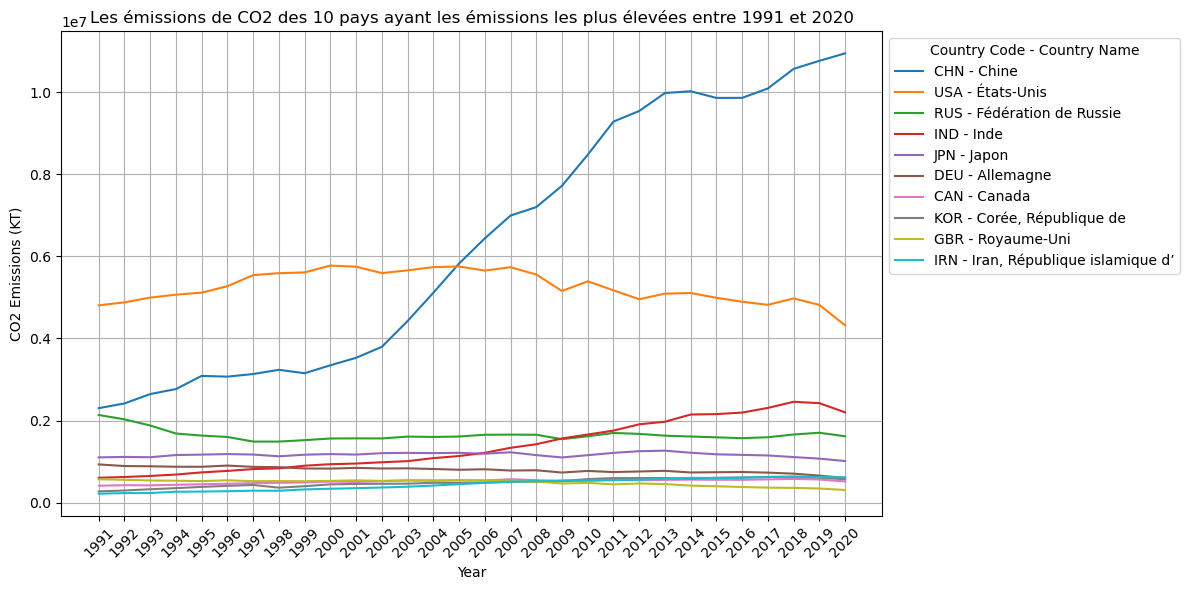

In [21]:
iso_country_codes_df = pd.read_csv('data\iso_3digit_alpha_country_codes.csv')

# Extract the unique country codes
valid_country_codes = iso_country_codes_df['Code Value'].unique()

# Filter the main DataFrame to include only valid country codes
df_filtered = df[df['Country Code'].isin(valid_country_codes)]

# Set the figure size
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Select the top 10 countries with the highest CO2 emissions in 1991
df_filtered['Total_CO2_Emissions'] = df_filtered.loc[:, '1991':'2020'].sum(axis=1)
top_10_highest = df_filtered.nlargest(10, 'Total_CO2_Emissions')

# Merge the metadata with the main DataFrame based on 'Country Code'
merged_df = pd.merge(top_10_highest, metadata_df, on='Country Code', how='left')

# Create an empty dictionary to store country code and name pairs
country_code_name = {}

# Iterate through rows and plot data for each country code
for index, row in merged_df.iterrows():
    # Extract country code and corresponding data (excluding the first column)
    country_code = row['Country Code']
    country_name = row['Country Name']
    data = row.loc['1991':'2020']  # Select data from 1991 to 2020
    income_group = row['Income_Group']
    plt.plot(data.index, data.values, linestyle='-', label=f"{country_code} - {country_name}")
    # Store the country code and name pair
    country_code_name[country_code] = country_name
    print(f"Country Code: {country_code}, Country Name: {country_name}, Income Group: {income_group}")

# Add labels and title
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (KT)')
plt.title('Les émissions de CO2 des 10 pays ayant les émissions les plus élevées entre 1991 et 2020')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Country Code - Country Name')  # Add legend outside the plot
plt.tight_layout()

# Show the plot
plt.show()

Dans cette analyse, nous avons mis en lumière les dix principaux émetteurs de CO2 entre 1990 et 2020, notant que la plupart de ces pays sont classés comme à revenu élevé. Cette corrélation souligne le lien entre le niveau de revenu et les émissions de CO2, souvent associées à des activités industrielles et à des modes de vie plus intensifs en énergie.

En revanche, en examinant les dix pays ayant émis le moins de CO2 sur la même période, il serait intéressant d'observer si cette tendance se maintient.

Country Code: TUV, Income Group: Revenu intermédiaire, tranche supérieure
Country Code: KIR, Income Group: Revenu intermédiaire, tranche inférieure
Country Code: NRU, Income Group: Revenu élevé
Country Code: STP, Income Group: Revenu intermédiaire, tranche inférieure
Country Code: VUT, Income Group: Revenu intermédiaire, tranche inférieure
Country Code: TON, Income Group: Revenu intermédiaire, tranche supérieure
Country Code: MHL, Income Group: Revenu intermédiaire, tranche supérieure
Country Code: DMA, Income Group: Revenu intermédiaire, tranche supérieure
Country Code: FSM, Income Group: Revenu intermédiaire, tranche inférieure
Country Code: COM, Income Group: Revenu intermédiaire, tranche inférieure


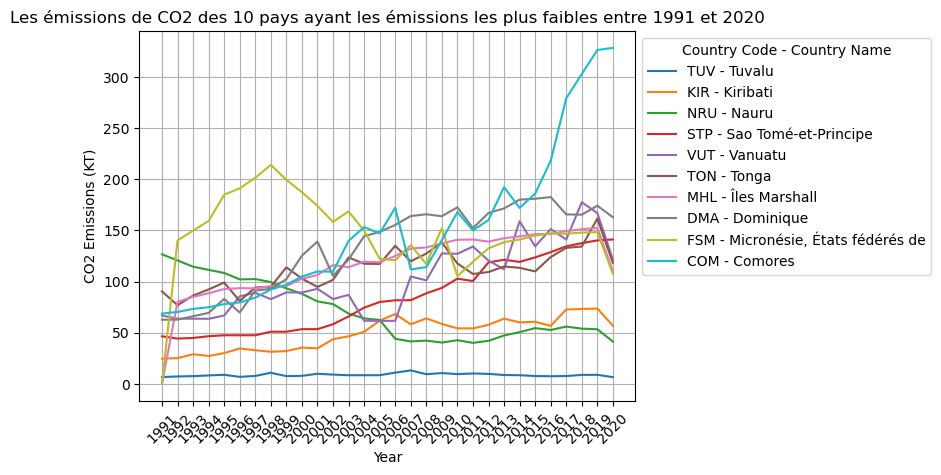

In [22]:
# Select the top 10 countries with the lowest CO2 emissions
df['Total_CO2_Emissions'] = df.loc[:, '1991':'2020'].sum(axis=1)
top_10_lowest = df.nsmallest(10, 'Total_CO2_Emissions')

# Merge the metadata with the main DataFrame based on 'Country Code'
merged_df = pd.merge(top_10_lowest, metadata_df, on='Country Code', how='left')

# Iterate through rows and plot data for each country code
for index, row in merged_df.iterrows():
    # Extract country code and corresponding data (excluding the first column)
    country_code = row['Country Code']
    country_name = row['Country Name']
    data = row.loc['1991':'2020']  # Select data from 1991 to 2020
    income_group = row['Income_Group']
    plt.plot(data.index, data.values, linestyle='-', label=f"{country_code} - {country_name}")
    print(f"Country Code: {country_code}, Income Group: {income_group}")

# Add labels and title
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (KT)')
plt.title('Les émissions de CO2 des 10 pays ayant les émissions les plus faibles entre 1991 et 2020')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Country Code - Country Name')

# Show the plot
plt.show()

En conclusion, l'analyse des émissions de CO2 révèle des écarts significatifs entre les principaux émetteurs et les moins émetteurs. Toutefois, il est crucial de prendre en compte la taille de la population de chaque pays pour une comparaison équitable de leurs émissions. Ainsi, afin d'évaluer plus précisément l'impact environnemental, nous prévoyons d'analyser les émissions de CO2 par habitant. Cette approche nous permettra de déterminer quels pays ont la plus grande empreinte carbone individuelle

In [23]:
df = pd.read_csv('data\API_EN.ATM.CO2E.PC_DS2_en_csv_v2_47017.csv')

tab = df.iloc[:,[1,4] + list(range(5, 34))]
selected_rows = pd.DataFrame(tab)
selected_rows.set_index('Country Code', inplace=True)

df.dropna(subset=df.loc[:, '1991':'2020'].columns, how='any', inplace=True)

Country Code: QAT, Country Name: Qatar, Income Group: High income
Country Code: BHR, Country Name: Bahrain, Income Group: High income
Country Code: BRN, Country Name: Brunei Darussalam, Income Group: High income
Country Code: KWT, Country Name: Kuwait, Income Group: High income
Country Code: ARE, Country Name: United Arab Emirates, Income Group: High income
Country Code: OMN, Country Name: Oman, Income Group: High income
Country Code: AUS, Country Name: Australia, Income Group: High income
Country Code: SAU, Country Name: Saudi Arabia, Income Group: High income
Country Code: CAN, Country Name: Canada, Income Group: High income
Country Code: USA, Country Name: United States, Income Group: High income


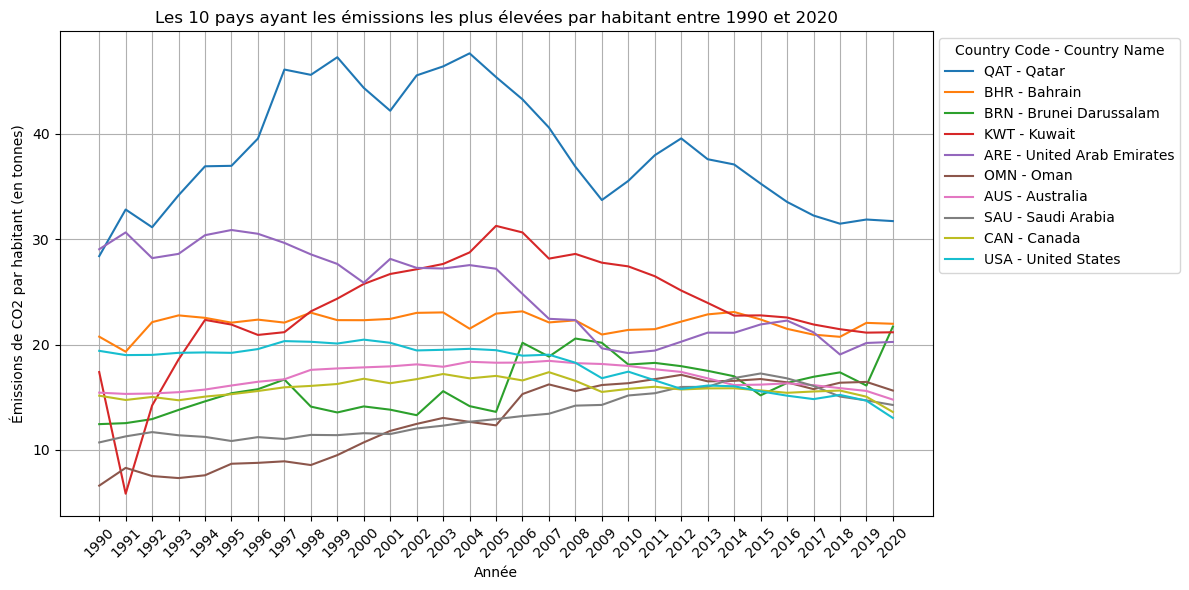

In [24]:
# import du dataset
df = pd.read_csv('data\API_EN.ATM.CO2E.PC_DS2_en_csv_v2_47017.csv')

# métadonnées des pays
metadata_df = pd.read_csv('data\Metadata_Country_API_EN.ATM.CO2E.PC_DS2_en_csv_v2_47017.csv')

# Sélection des colonnes pertinentes
metadata_df = metadata_df[['Country Code', 'IncomeGroup']]

# Fusion des métadonnées avec le DataFrame principal sur la base du 'Country Code'
merged_df = pd.merge(df, metadata_df, on='Country Code', how='left')

# On exclut les continents
excluded_continents = ['AFRICA', 'EUROPE', 'NORTH AMERICA', 'SOUTH AMERICA', 'ASIA', 'OCEANIA']
df_filtered = merged_df[~merged_df['Country Name'].str.upper().isin(excluded_continents)]

# Sélectionner les 10 pays avec les émissions par habitant les plus élevées en 2020
top_10_highest = df_filtered.nlargest(10, '2020')

# Créer un graphique pour les émissions par habitant de chaque pays
plt.figure(figsize=(12, 6))
for index, row in top_10_highest.iterrows():
    # Extraire le code pays et les données correspondantes (à l'exclusion de la première colonne)
    country_code = row['Country Code']
    country_name = row['Country Name']
    data = row.loc['1990':'2020']  # Sélectionner les données de 1990 à 2020
    income_group = row['IncomeGroup']  # Récupérer l'Income Group
    plt.plot(data.index, data.values, linestyle='-', label=f"{country_code} - {country_name}")
    print(f"Country Code: {country_code}, Country Name: {country_name}, Income Group: {income_group}")

# étiquettes et titre
plt.xlabel('Année')
plt.ylabel('Émissions de CO2 par habitant (en tonnes)')
plt.title('Les 10 pays ayant les émissions les plus élevées par habitant entre 1990 et 2020')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Country Code - Country Name')
plt.tight_layout()

# Affichage du graphique
plt.show()

La synthèse des données révèle que tous les pays affichant les émissions de CO2 par habitant les plus élevées appartiennent à la catégorie des pays à revenu élevé. Cette observation suggère une corrélation entre le niveau de revenu d'un pays et son impact environnemental par habitant. Les nations à revenu élevé ont souvent des économies fortement industrialisées et consommatrices d'énergie, ce qui conduit à des émissions plus importantes de CO2 par habitant. Ces résultats soulignent l'importance de tenir compte des disparités économiques lors de l'analyse des émissions de CO2. Afin de vérifier notre hypothèse, nous allons étudier les pays qui polluent le moins par habitant.

Country Code: COD, Country Name: Congo, Dem. Rep., Income Group: Low income
Country Code: SOM, Country Name: Somalia, Income Group: Low income
Country Code: CAF, Country Name: Central African Republic, Income Group: Low income
Country Code: BDI, Country Name: Burundi, Income Group: Low income
Country Code: MWI, Country Name: Malawi, Income Group: Low income
Country Code: NER, Country Name: Niger, Income Group: Low income
Country Code: TCD, Country Name: Chad, Income Group: Low income
Country Code: MDG, Country Name: Madagascar, Income Group: Low income
Country Code: RWA, Country Name: Rwanda, Income Group: Low income
Country Code: SLE, Country Name: Sierra Leone, Income Group: Low income


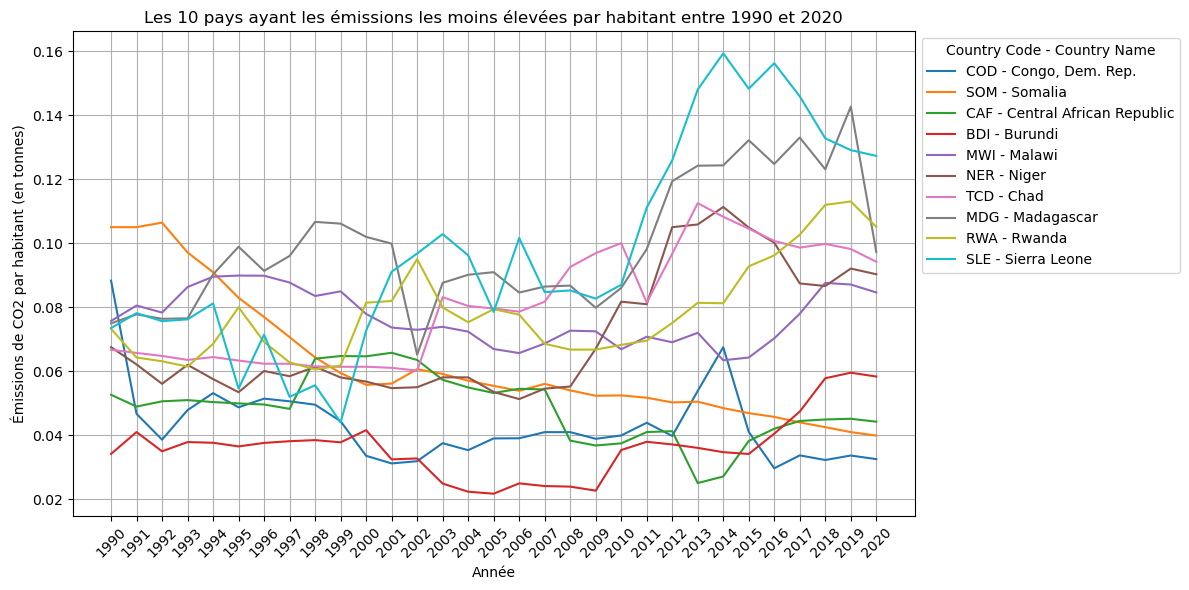

In [25]:
df = pd.read_csv('data\API_EN.ATM.CO2E.PC_DS2_en_csv_v2_47017.csv')

# métadonnées des pays
metadata_df = pd.read_csv('data\Metadata_Country_API_EN.ATM.CO2E.PC_DS2_en_csv_v2_47017.csv')

# Sélection des colonnes pertinentes
metadata_df = metadata_df[['Country Code', 'IncomeGroup']]

# Fusionner les métadonnées avec le DataFrame principal sur la base du 'Country Code'
merged_df = pd.merge(df, metadata_df, on='Country Code', how='left')

# On exclut les continents
excluded_continents = ['AFRICA', 'EUROPE', 'NORTH AMERICA', 'SOUTH AMERICA', 'ASIA', 'OCEANIA']
df_filtered = merged_df[~merged_df['Country Name'].str.upper().isin(excluded_continents)]

# Sélectionner les 10 pays avec les émissions par habitant les moins élevées en 2020
bottom_10_lowest = df_filtered.nsmallest(10, '2020')

# Créer un graphique pour les émissions par habitant de chaque pays
plt.figure(figsize=(12, 6))
for index, row in bottom_10_lowest.iterrows():
    # Extraire le code pays et les données correspondantes (à l'exclusion de la première colonne)
    country_code = row['Country Code']
    country_name = row['Country Name']
    data = row.loc['1990':'2020']  # Sélectionner les données de 1990 à 2020
    income_group = row['IncomeGroup']  # Récupérer l'Income Group
    plt.plot(data.index, data.values, linestyle='-', label=f"{country_code} - {country_name}")
    print(f"Country Code: {country_code}, Country Name: {country_name}, Income Group: {income_group}")

# étiquettes et titre
plt.xlabel('Année')
plt.ylabel('Émissions de CO2 par habitant (en tonnes)')
plt.title('Les 10 pays ayant les émissions les moins élevées par habitant entre 1990 et 2020')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Country Code - Country Name')
plt.tight_layout()

# Affichage du graphique
plt.show()

L'analyse révèle que les 10 pays émettant le moins de CO2 par habitant sont tous des pays à faible revenu. Cela suggère que les économies moins développées peuvent avoir des empreintes carbone individuelles moins élevées, probablement en raison d'une moindre industrialisation et de modes de vie moins énergivores.

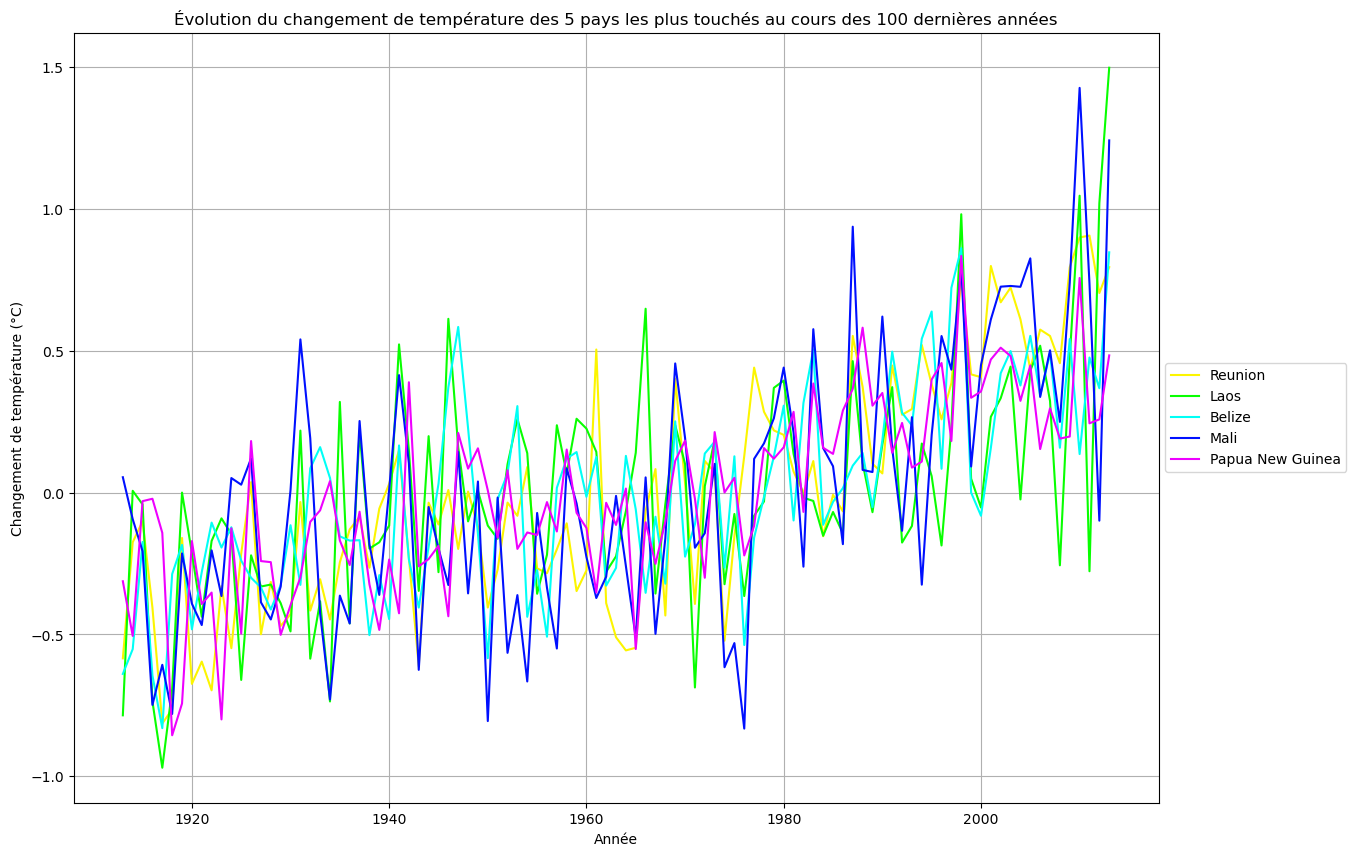

In [26]:
import seaborn as sns

def plus_touches(n_annees, n_pays):
    """
    Calcule et affiche les (n_pays = 10, 15, 40,...) pays les plus touchés par le changement de
    température au cours des (n_annees = 10, 20,, 40, …) dernières années
    PARAMETRES
    n_annees (int) : nombre d'années depuis lesquelles on observe le changement des températures
    n_pays (int) : nombre de pays les plus touchés que l'on souhaite afficher
    """
    # Dataset
    df = pd.read_csv('data\GlobalLandTemperaturesByCountry.csv')

    # Convertir la colonne 'dt' en type datetime
    df['dt'] = pd.to_datetime(df['dt'])

    # Extraire l'année de la colonne 'dt'
    df['Year'] = df['dt'].dt.year

    # Sélection des données pour les n_annees dernières années
    last_n_years_data = df[df['Year'] >= (df['Year'].max() - n_annees)]

    # Moyenne des températures pour chaque pays et chaque année
    average_temperature_per_country_per_year = last_n_years_data.groupby(['Country', 'Year'])['AverageTemperature'].mean().reset_index()

    # Différence entre la température moyenne des n_annees dernières années et la moyenne historique
    average_temperature_per_country_per_year['TemperatureChange'] = average_temperature_per_country_per_year.groupby('Country')['AverageTemperature'].transform(lambda x: x - x.mean())

    # On sélectionne les n_pays pays les plus touchés par le changement de température
    top_n_countries = average_temperature_per_country_per_year.groupby('Country')['TemperatureChange'].mean().nlargest(n_pays)

    # On sélectionne les données pour les n_pays pays les plus touchés
    data_top_n_countries = average_temperature_per_country_per_year[average_temperature_per_country_per_year['Country'].isin(top_n_countries.index)]

    # Partie graphique
    plt.figure(figsize=(14, 10))
    palette = sns.color_palette("hsv", len(top_n_countries))
    for i, country in enumerate(top_n_countries.index):
        country_data = data_top_n_countries[data_top_n_countries['Country'] == country]
        plt.plot(country_data['Year'], country_data['TemperatureChange'], label=country, color=palette[i])

    plt.xlabel('Année')
    plt.ylabel('Changement de température (°C)')
    plt.title(f'Évolution du changement de température des {n_pays} pays les plus touchés au cours des {n_annees} dernières années')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.show()
   
#Afficher les 5 pays les plus touchés par le changement de température au cours des 100 dernières années
plus_touches(100, 5)

#Afficher les 10 pays les plus touchés par le changement de température au cours des 100 dernières années
#plus_touches(100, 10)


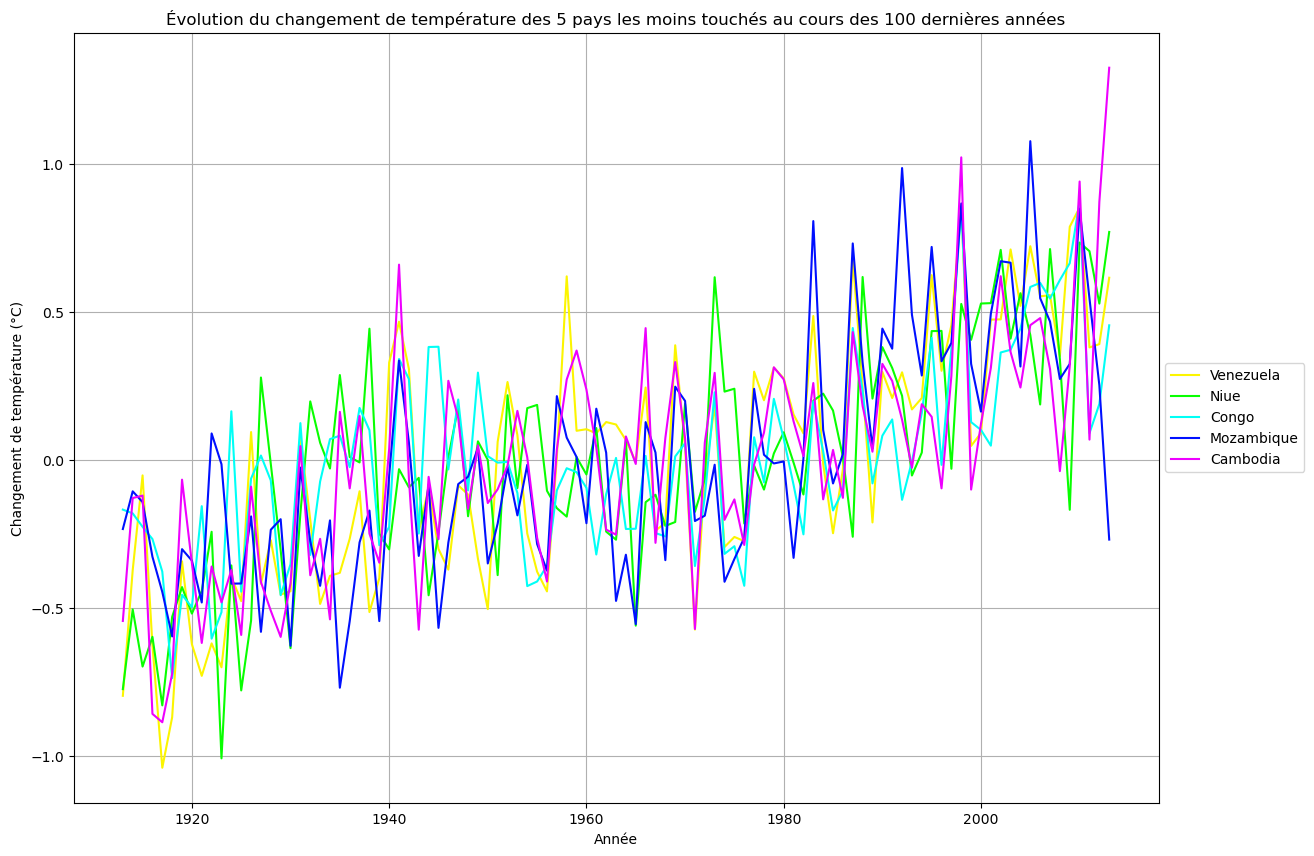

In [27]:
def moins_touches(n_annees, n_pays):
    """
    Calcule et affiche les (n_pays = 10, 15, 40,...) pays les moins touchés par le changement de
    température au cours des (n_annees = 10, 20,, 40, …) dernières années
    PARAMETRES
    n_annees (int) : nombre d'années depuis lesquelles on observe le changement des températures
    n_pays (int) : nombre de pays les moins touchés que l'on souhaite afficher
    """
     # Dataset
    df = pd.read_csv('data\GlobalLandTemperaturesByCountry.csv')

    # Convertir la colonne 'dt' en type datetime
    df['dt'] = pd.to_datetime(df['dt'])

    # Extraire l'année de la colonne 'dt'
    df['Year'] = df['dt'].dt.year

    # Sélection des données pour les n_annees dernières années
    last_n_years_data = df[df['Year'] >= (df['Year'].max() - n_annees)]

    # Moyenne des températures pour chaque pays et chaque année
    average_temperature_per_country_per_year = last_n_years_data.groupby(['Country', 'Year'])['AverageTemperature'].mean().reset_index()

    # Différence entre la température moyenne des n_annees dernières années et la moyenne historique
    average_temperature_per_country_per_year['TemperatureChange'] = average_temperature_per_country_per_year.groupby('Country')['AverageTemperature'].transform(lambda x: x - x.mean())

    # Inverser les températures pour trouver les pays les moins touchés
    top_n_countries = average_temperature_per_country_per_year.groupby('Country')['TemperatureChange'].mean().nsmallest(n_pays)

    # Sélectionner les données pour les pays les moins touchés
    data_top_n_countries = average_temperature_per_country_per_year[average_temperature_per_country_per_year['Country'].isin(top_n_countries.index)]

    # Partie graphique
    plt.figure(figsize=(14, 10))
    palette = sns.color_palette("hsv", len(top_n_countries))
    for i, country in enumerate(top_n_countries.index):
        country_data = data_top_n_countries[data_top_n_countries['Country'] == country]
        plt.plot(country_data['Year'], country_data['TemperatureChange'], label=country, color=palette[i])

    plt.xlabel('Année')
    plt.ylabel('Changement de température (°C)')
    plt.title(f'Évolution du changement de température des {n_pays} pays les moins touchés au cours des {n_annees} dernières années')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.show()

    
#Afficher les 5 pays les moins touchés par le changement de température au cours des 100 dernières années
moins_touches(100, 5)

# Afficher les 10 pays les moins touchés par le changement de température au cours des 100 dernières années
#moins_touches(100, 10)


Malgré le fait que ces pays soient moins touchés par le changement des températures, on remarque tout de même une tendance haussière lors des toutes dernières années et notamment des valeurs de plus en plus extrêmes, qu'il s'agisse d'augmentation ou de diminution de la température.
Nous allons maintenant visualiser l'évolution des deviations de température dans le monde entier, entre les années 1961 et 2019 à l'aide d'une carte intéractive.

In [28]:
df = pd.read_excel("data\Temperature.xlsx")

colonnes_à_supprimer = ["Area Code", "Element Code", "Months Code", "Unit"]
df.drop(colonnes_à_supprimer, axis = 1, inplace = True)

temp_df = df[df["Element"]=="Temperature change"]
temp_df.drop("Element", axis = 1,inplace = True)

temp_df_grouped = temp_df.drop("Months", axis=1).groupby("Area").mean()

#Dataframe pays pour filtrer la datatframe temp_df_grouped
pays = pd.read_csv("data\iso_3digit_alpha_country_codes.csv")

temp_df_grouped = temp_df_grouped[temp_df_grouped.index.isin(pays['Definition'])]
temp_df_grouped.columns = temp_df_grouped.columns.astype(int)

# Renommer la colonne "Definition" en "Area" dans la dataframe "pays"
pays.rename(columns={"Definition": "Area"}, inplace=True)

# Fusionner temp_df_grouped avec la dataframe pays pour associer les codes des pays
temp_df_grouped = temp_df_grouped.merge(pays, on="Area", how="left")

ordre_colonnes = list(temp_df_grouped.columns)
ordre_colonnes[0], ordre_colonnes[-1] = ordre_colonnes[-1], ordre_colonnes[0]
temp_df_grouped = temp_df_grouped[ordre_colonnes]
temp_df_grouped.drop("Area", axis = 1, inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13328\3595311259.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
def Map_annee(temp_df_grouped, pays):
    annees = [i for i in range(1961, 2020)]
    color_min = -3
    color_max = +3.5
    fig = px.choropleth(temp_df_grouped,
                        locations='Code Value',geojson=pays,
                        color=temp_df_grouped.columns[1],
                        color_continuous_scale='Jet',
                        range_color=(color_min, color_max), 
                        color_continuous_midpoint=None,labels={temp_df_grouped.columns[0]: 'Deviations de temperature en °C'},
                        title="Deviations de température dans le monde par année en °C",
                        hover_name="Code Value")
    steps = []
    for col in temp_df_grouped.columns[1:]:
        step = {'method': 'update', 'label': col, 'args': [{'z': [temp_df_grouped[col]]}]}
        steps.append(step)

# Ajoutez le curseur pour changer la colonne affichée
    fig.update_layout(
        sliders=[{'steps': steps}]
    )
    fig.show()

pays = initgeojson()
Map_annee(temp_df_grouped, pays)

La carte ci-dessus illustre les variations de température par pays. Les zones colorées représentent les niveaux de déviations de température par rapport à la moyenne historique, allant du bleu (températures inférieures à la moyenne) au rouge (températures supérieures à la moyenne). Ces variations témoignent des changements climatiques en cours dans différentes régions du monde. Les températures plus élevées peuvent avoir des répercussions sur les écosystèmes, les ressources en eau, l'agriculture et les phénomènes météorologiques extrêmes. Les régions polaires et les zones montagneuses sont particulièrement sensibles à ces variations. Des actions pour réduire les émissions de gaz à effet de serre et s'adapter aux changements climatiques sont de plus en plus nécessaires pour assurer un avenir durable pour notre planète.

Le graphe suivant est un graphe qui illustre la relation entre les déviations de temperature observées et les emissions de CO2.

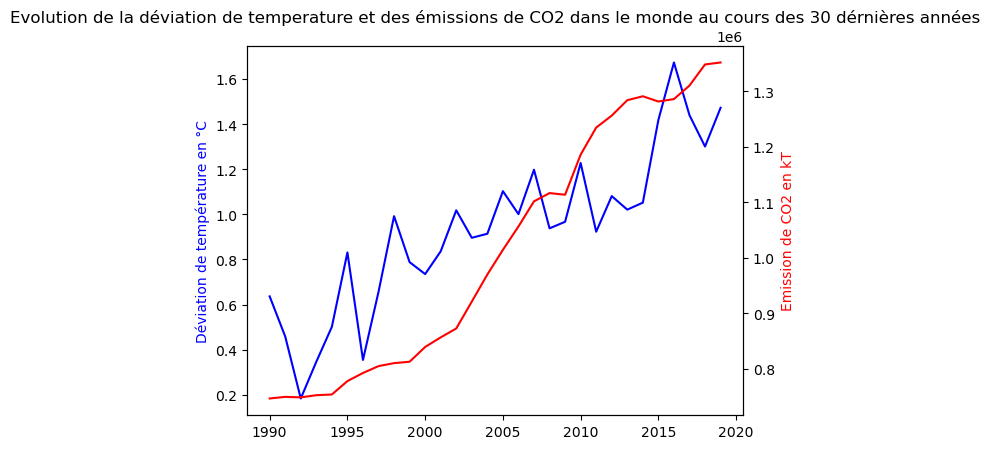

In [30]:
# Dataset
dfTemp = pd.read_csv('data/Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='latin1')

# Filtrer les données pour obtenir les données mondiales sur le changement de température pour toute l'année météorologique
dfTemp = dfTemp.drop(dfTemp[dfTemp['Months'] != 'Meteorological year'].index, inplace=False)
dfTemp = dfTemp.drop(dfTemp[dfTemp['Area'] != 'World'].index, inplace=False)
dfTemp = dfTemp.drop(dfTemp[dfTemp['Element'] != 'Temperature change'].index, inplace=False)
colonnes_a_supprimer = ['Area Code', 'Months', 'Area', 'Months Code', 'Element Code', 'Element', 'Unit']
dfTemp = dfTemp.drop(columns=colonnes_a_supprimer)

# Supprimer les colonnes inutiles
dfTemp = dfTemp.drop(dfTemp.columns[:29], axis=1)

# Chargement des codes de pays
dfPays = pd.read_csv('data/all.csv', encoding='latin1')
dfPays = dfPays.rename(columns={'alpha-3': 'Country Code'})
dfPays = dfPays['Country Code']

# Chargement des données sur les émissions de CO2
df2 = pd.read_csv('data/API_EN.ATM.CO2E.KT_DS2_fr_csv_v2_6301000.csv')
df_redi = df2
df_redi.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', '2020', '2021', '2022']
colonnes_a_supprimer = ['Country Name', 'Indicator Name', 'Indicator Code', '2020', '2021', '2022']
df_redi = df_redi.drop(columns=colonnes_a_supprimer)

# Calculer la moyenne des émissions de CO2 par année
abc = df_redi.mean(numeric_only=True)

# Créer un DataFrame à partir des moyennes des émissions de CO2
df_result = pd.DataFrame([abc.values], columns=abc.index)

# Sélectionner les années
annee = ['Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019']

# Fusionner les données sur les changements de température avec les données sur les émissions de CO2
df_all = pd.merge(dfTemp, df_result, on=annee, how='outer')

# Obtenir les valeurs
num = df_all.values
temp = num[0]
co2 = num[1]

# Liste des années
liste_annees = [annee for annee in range(1990, 2020)]

# Créer un graphique avec deux axes y
fig, ax1 = plt.subplots()

# Tracer le changement de température
ax1.plot(liste_annees, temp, color='blue', label='Année')
ax1.set_ylabel('Déviation de température en °C', color='blue')

# Créer un deuxième axe y
ax2 = ax1.twinx()

# Tracer les émissions de CO2
ax2.plot(liste_annees, co2, color='red', label='Année')
ax2.set_ylabel('Emission de CO2 en kT', color='red')

# Afficher le graphique
plt.title("Evolution de la déviation de temperature et des émissions de CO2 dans le monde au cours des 30 dérnières années")
plt.show()

Le graphe ci-dessus suggère la forte existence d'une corrélation significative entre ces deux facteurs. Le graphique montre une tendance croissante à la fois dans les émissions de CO2 et dans les variations de température au fil des ans. Cette observation suggère que les activités humaines, notamment la combustion de combustibles fossiles et d'autres activités industrielles, contribuent de manière substantielle à l'augmentation des émissions de CO2, ce qui à son tour influence le climat en entraînant des variations de température. Par la suite, une analyse de la croissance démographique dans divers pays sera entreprise afin d'évaluer son possible impact sur les fluctuations de température observées, renforçant ainsi notre compréhension des mécanismes sous-jacents du changement climatique.

In [31]:
#### Dataset Population
donnees_demo = pd.read_excel('data/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_REV1.xlsx', skiprows=16)

#choir le code ISO3 comme index
donnees_demo.set_index('ISO3 Alpha-code', inplace=True)

#Supprimer les colonnes inutile 
colonnes_a_supprimer = ['Index', 'Variant', 'Notes', 'Location code', 'ISO2 Alpha-code','SDMX code**', 'Parent code']
donnees_demo.drop(columns=colonnes_a_supprimer, inplace = True)

#Filtrer la colonne Type pour ne contenir que des pays et les données à partir de 1990
pays_demo = donnees_demo.loc[donnees_demo['Type'] == 'Country/Area']

In [32]:
df = pd.read_excel("data\Temperature.xlsx")

colonnes_à_supprimer = ["Area Code", "Element Code", "Months Code", "Unit"]
df.drop(colonnes_à_supprimer, axis = 1, inplace = True)

temp_df = df[df["Element"]=="Temperature change"]
temp_df.drop("Element", axis = 1,inplace = True)

temp_df_grouped = temp_df.drop("Months", axis=1).groupby("Area").mean()

#Dataframe pays pour filtrer la datatframe temp_df_grouped
pays = pd.read_csv("data\iso_3digit_alpha_country_codes.csv")

temp_df_grouped = temp_df_grouped[temp_df_grouped.index.isin(pays['Definition'])]
temp_df_grouped.columns = temp_df_grouped.columns.astype(int)

C:\Users\hp\AppData\Local\Temp\ipykernel_13328\3762636871.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
#La fonction plot_temperature_population trace le graphe décrivant l'évolution de la temperature et de la population au cours des années
def plot_temperature_population(nom_pays, code_pays):
    
    # Filtrer les données pour le pays spécifié
    pays_demo_instance = pays_demo[pays_demo.index == code_pays]
    donnees_temp_instance=temp_df_grouped[temp_df_grouped.index==nom_pays]
    
    # Créer un graphique avec deux axes y
    fig, ax1 = plt.subplots(figsize=(4, 3))

    # Tracer le changement de température
    ax1.plot(donnees_temp_instance.columns, donnees_temp_instance.values[0], color='r', label='Changement de temperature')
    ax1.set_ylabel('Changement de temperature (en °C)', color='r')
    ax1.tick_params('y', colors='r')

    # Créer un deuxième axe y
    ax2 = ax1.twinx()

    # Tracer l'evolution de la population
    ax2.plot(pays_demo_instance['Year'], pays_demo_instance['Total Population, as of 1 July (thousands)'], color='blue', label='Population')
    ax2.set_xlabel('Année')
    ax2.set_ylabel('Population (en milliers)', color='blue')
    ax2.tick_params('y', colors='blue')

    # Afficher le graphique
    plt.title('Changement de température et population pour {}'.format(nom_pays))
    plt.show()

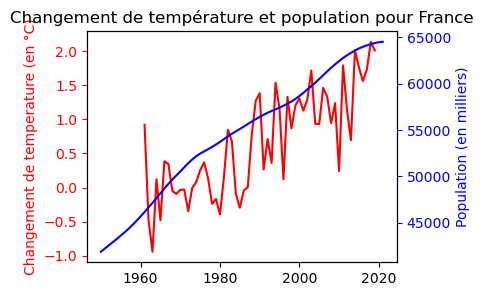

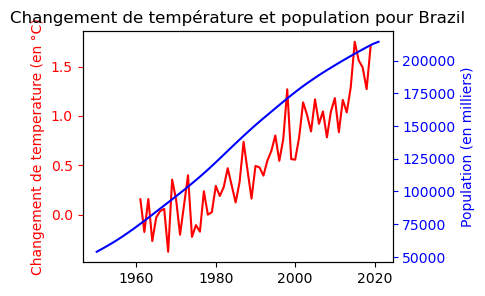

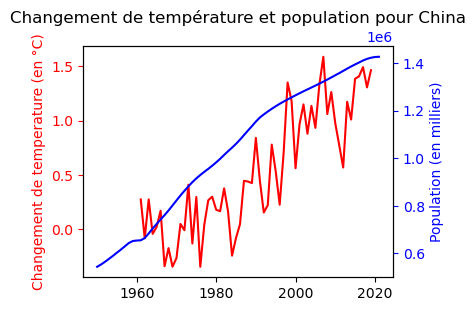

In [34]:
plot_temperature_population('France','FRA')
plot_temperature_population('Brazil','BRA')
plot_temperature_population('China','CHN')

En conclusion, les multiples graphiques et analyses effectués au cours de ce rapport fournissent des preuves de l'existence du réchauffement climatique à l'échelle mondiale. Les données ont révélé une tendance claire à l'augmentation des températures et des émissions de CO2 dans de nombreux pays, même si certains ont été moins touchés que d'autres. De plus, la comparaison des variations de température avec les émissions de CO2 d'une part et la croissance démographique d'une autre a mis en évidence une corrélation significative entre ces facteurs, renforçant ainsi le consensus scientifique sur le rôle des activités humaines dans le changement climatique.